<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/NY_MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workflow
This colab uses the labeled NY data for multi class classification of super spread. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.multiclass import OneVsRestClassifier

# Load Data

In [ ]:
NY_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Sep26.csv',low_memory=False)
NY_labeled_data.head()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,population,label,growth_label,New Cases/1k population,growth_label_1k,growth_1k_pop
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,305506.0,LessSpread,flat_growth,0.0,flat_growth,0.0
1,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,24913.0,LessSpread,flat_growth,0.0,flat_growth,0.0
2,2020-03-01,36021,Columbia County,21.0,4.0,0.0,25.0,4.0,0.0,19.75,5.337,58,93.682154,0,0.0,0,0.0,59461.0,LessSpread,flat_growth,0.0,flat_growth,0.0
3,2020-03-01,36095,Schoharie County,26.0,9.0,0.0,0.0,13.0,0.0,24.47,2.137,27,49.852047,0,0.0,0,0.0,30999.0,LessSpread,flat_growth,0.0,flat_growth,0.0
4,2020-03-01,36033,Franklin County,28.0,27.0,0.0,0.0,7.0,0.0,10.82,2.205,56,30.704920,0,0.0,0,0.0,50022.0,LessSpread,flat_growth,0.0,flat_growth,0.0


In [ ]:
NY_labeled_data.columns

Index(['Date', 'fips_x', 'County Name', 'retail and recreation',
       'grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential', 'driving', 'm50', 'm50_index', 'population_density',
       'mask_rule_active', 'mask_wearing_percent', 'New cases',
       'rolling_avg_new_cases', 'population', 'label', 'growth_label',
       'New Cases/1k population', 'growth_label_1k', 'growth_1k_pop'],
      dtype='object')

# Training and Test data

In [ ]:
NY_labeled_data["label"] = NY_labeled_data["label"].astype('category')
NY_labeled_data['spread_cat']= NY_labeled_data["label"].cat.codes

In [ ]:
NY_labeled_data.label.unique() 

array(['LessSpread', 'SuperSpread', 'Spread', nan], dtype=object)

In [ ]:
feature_cols= ['retail and recreation',
       'grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential', 'driving', 'm50', 'm50_index', 'population_density',
       'mask_rule_active', 'mask_wearing_percent', 'New cases',
       'rolling_avg_new_cases']
target= [ 'spread_cat']



In [ ]:
X = NY_labeled_data[feature_cols].values
Y = NY_labeled_data[target].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

# Random Forest

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = rf_classifier.predict(X_test)

Random Forest Accuracy: 1.0


## Accuracy

In [ ]:
accu_score = accuracy_score(Y_test, Y_pred)
print("Random Forest Accuracy: " + str(accu_score))

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[   4    0    0    0]
 [   0 2882    0    0]
 [   0    0   20    0]
 [   0    0    0   36]]


[[   4    0    0    0]
 [   0 2882    0    0]
 [   0    0   20    0]
 [   0    0    0   36]]


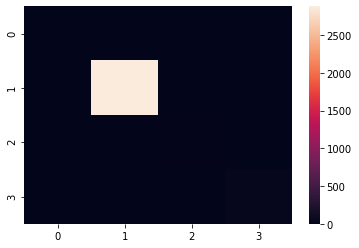

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

# KNN

## Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred = knn_classifier.predict(X_test)

## Accuracy

In [ ]:
accu_score = accuracy_score(Y_test, Y_pred)
print("KNN Accuracy: " + str(accu_score))

Random Forest Accuracy: 0.9840244731475187


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[   0    4    0    0]
 [   2 2878    1    1]
 [   0   12    8    0]
 [   0   27    0    9]]


[[   0    4    0    0]
 [   2 2878    1    1]
 [   0   12    8    0]
 [   0   27    0    9]]


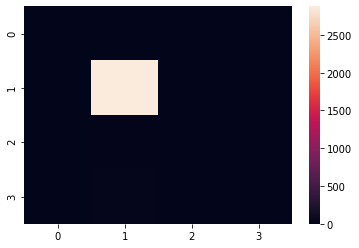

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

# Ensemble of Binary Classifiers (One vs Rest)

##XGBoost

### Model

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(X_train, Y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [ ]:
Y_pred = xgb_classifier.predict(X_test)

### Accuracy

In [ ]:
accu_score = accuracy_score(Y_test, Y_pred)
print("XGBoost Accuracy: " + str(accu_score))

Random Forest Accuracy: 0.9830047586675731


In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[   0    4    0    0]
 [   0 2880    1    1]
 [   0   19    1    0]
 [   0   25    0   11]]


[[   0    4    0    0]
 [   0 2880    1    1]
 [   0   19    1    0]
 [   0   25    0   11]]


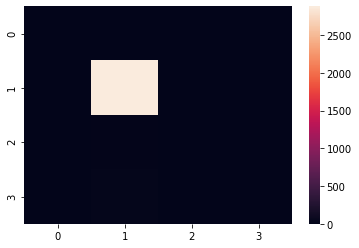

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

## SVM

### Model

In [47]:
from sklearn.svm import SVC

svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
Y_pred = svm_classifier.predict(X_test)

### Accuracy

In [49]:
accu_score = accuracy_score(Y_test, Y_pred)
print("SVM Accuracy: " + str(accu_score))

SVM Accuracy: 0.9796057104010877


In [50]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[   0    4    0    0]
 [   0 2882    0    0]
 [   0   20    0    0]
 [   0   36    0    0]]


[[   0    4    0    0]
 [   0 2882    0    0]
 [   0   20    0    0]
 [   0   36    0    0]]


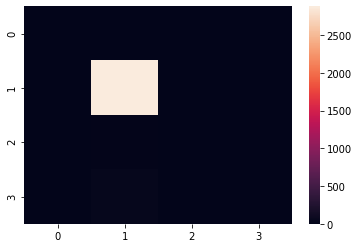

In [51]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

# References

* https://machinelearningmastery.com/multi-label-classification-with-deep-learning/
* https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc 